In [89]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
seaborn.set_style('darkgrid')

In [90]:
df = pd.read_csv('antdata.csv')
cols = list(df.columns)
cols[0] = 'Species'
df.columns = cols

## Re-analysis with only complete data

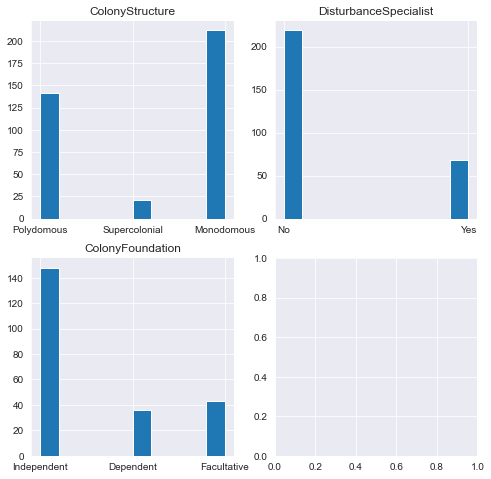

In [122]:
id_vars = ['ColonyStructure', 'DisturbanceSpecialist', 'ColonyFoundation']
df_sc = df[~df.ColonyStructure.isna()].copy()

f, ax = plt.subplots(nrows=2, ncols=2, figsize = (8,8))
ax = ax.ravel()
for i, idv in enumerate(id_vars):
    df_sc[idv].hist(ax=ax[i])
    ax[i].set_title(idv)
    seaborn.despine()

In [124]:
df_sc['Invasive'] = df_sc['InvasivenessStatus'] == 'Invasive'
formula = 'Invasive ~ C({}) + C({}) + C({})'.format(*id_vars)

In [125]:
formula

'Invasive ~ C(ColonyStructure) + C(DisturbanceSpecialist) + C(ColonyFoundation)'

In [126]:
glm_1 = smf.glm(formula, df_sc, family=sm.families.Binomial())
res = glm_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Generalized Linear Model Regression Results                           
=================================================================================================
Dep. Variable:     ['Invasive[False]', 'Invasive[True]']   No. Observations:                  195
Model:                                               GLM   Df Residuals:                      189
Model Family:                                   Binomial   Df Model:                            5
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -21.344
Date:                                   Wed, 21 Oct 2020   Deviance:                       42.687
Time:                                           15:17:14   Pearson chi2:                     538.
No. Iterations:                                        8                                         
Covariance Type:                               nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               3.9623      1.381      2.869      0.004       1.255       6.669
C(ColonyStructure)[T.Polydomous]        0.5414      1.177      0.460      0.645      -1.765       2.848
C(ColonyStructure)[T.Supercolonial]    -2.6734      1.142     -2.340      0.019      -4.912      -0.435
C(DisturbanceSpecialist)[T.Yes]        -2.9317      1.148     -2.553      0.011      -5.182      -0.681
C(ColonyFoundation)[T.Facultative]      0.2149      0.941      0.228      0.819      -1.630       2.059
C(ColonyFoundation)[T.Independent]      2.2669      1.357      1.671      0.095      -0.392       4.926
=======================================================================================================
"""